# Clustering Algorithms Problem 1

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

 
The file East Wes Airlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers


### Data Description:

- ID : Unique ID

- Balance : Number of miles eligible for award travel

- Qual_mile : Number of miles counted as qualifying for Topflight status

- cc1_miles : Number of miles earned with freq. flyer credit card in the past 12 months:
  cc2_miles : Number of miles earned with Rewards credit card in the past 12 months:
  cc3_miles : Number of miles earned with Small Business credit card in the past 12 months:
  Categorical values for above miles:
    1 = under 5,000
    2 = 5,000 - 10,000
    3 = 10,001 - 25,000
    4 = 25,001 - 50,000
    5 = over 50,000

- Bonus_miles : Number of miles earned from non-flight bonus transactions in the past 12 months

- Bonus_trans : Number of non-flight bonus transactions in the past 12 months

- Flight_miles_12mo : Number of flight miles in the past 12 months

- Flight_trans_12 : Number of flight transactions in the past 12 months

- Days_since_enrolled : Number of days since enrolled in flier program

- Award : whether that person had award flight (free flight) or not


 

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - perform EDA. show profiling.
    - check data info and null values.
2. Feature analysis
    - understand all features involeved.
    - list out features that needs to be considered in the model.
3. Standardize/Normalize the data
    - Use necessary scaler and standardize/normalize the data.
4. K-Means Clustering
    - Determine the hyperparameter via elbow graph.
    - build K-means algorithm.
    - get cluster.labels_
    - try out visulalizations to understand the clusters better.
5. Heirarchial Agglomerative Clustering
    - identify the hyperparementer (number of clusters).
    - make dentogram of model and specify the linkage.
    - perform agglomerative clustering.
    - get cluster.labels_
    - try out visulalizations to understand the clusters better.
6. DBSCAN Clustering
    - Identify suitable epsilon and min pts values.
    - check labeling of points(core,border,noise pts).
    - try out visulalizations to understand the clusters better.
7. Compare the models and visualisations with each other
8. Conclusion



## Import New Dataset



In [7]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from matplotlib import pyplot as plt
raw_data = pd.read_excel("D:\\Education\\ExcelR Assignments\\7\\EastWestAirlines.xlsx",sheet_name='data',index_col=0)
raw_data.rename(columns={'Award?':'award'}, inplace=True)
raw_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
raw_data.info()
#There are no null values & All are numercial values 
#There are total 10 features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [9]:
raw_data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
#EDA_report= pp.ProfileReport(raw_data)
#EDA_report.to_file(output_file='Airliner.html') 

<AxesSubplot:>

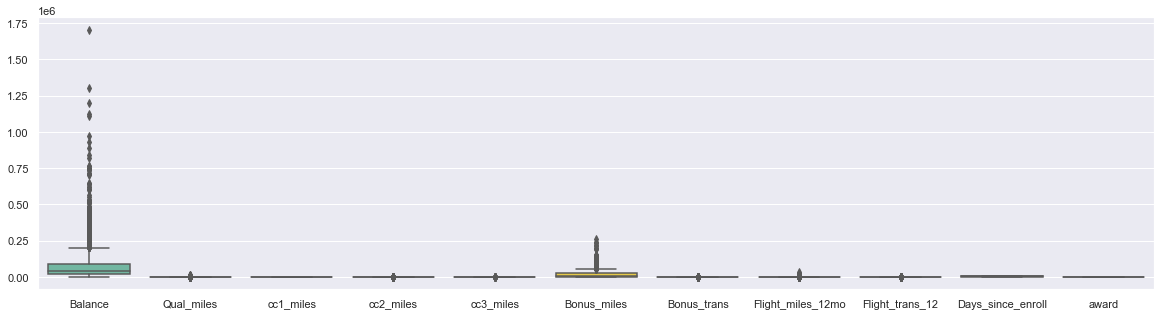

In [66]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=raw_data, orient="v", palette="Set2") 
#There are major outliers in the case of balance and bonus_miles. 
#However, we cannot remove those outliers since the data may actually be true depending on the person travelling.

## Feature Analysis

All features in the dataset can be used in model building. All values are numerical and no additional dummy variable creation is required. All values represent very specific characteristics of each person flying and this in turn would be great for clusting.

## Standardizing the Data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_data.iloc[:,0:])

## Normalize the Data


In [17]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = raw_data.iloc[:,0:]

norm_scaler = MinMaxScaler(feature_range=(0,1))
normscaled = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(normscaled[:5])


[[-0.45 -0.19 -0.77 -0.1  -0.06 -0.7  -1.1  -0.33 -0.36  1.4  -0.77]
 [-0.54 -0.19 -0.77 -0.1  -0.06 -0.7  -1.   -0.33 -0.36  1.38 -0.77]
 [-0.32 -0.19 -0.77 -0.1  -0.06 -0.54 -0.79 -0.33 -0.36  1.41 -0.77]
 [-0.58 -0.19 -0.77 -0.1  -0.06 -0.69 -1.1  -0.33 -0.36  1.37 -0.77]
 [ 0.24 -0.19  1.41 -0.1  -0.06  1.08  1.5   1.15  0.69  1.36  1.3 ]]


## K-Means Clustering

#### Finding optimum number of clusters.

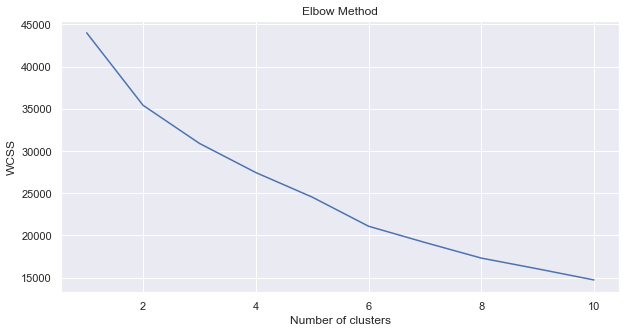

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

sns.set(rc={'figure.figsize':(10,5)}) 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Number of clusters(optimum) = 5

#### Building Clustering Algorithm

In [75]:
clusters_kmeans = KMeans(5, random_state=5)
clusters_kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=5)

#### Get Clusters.labels_

In [76]:
clusters_kmeans.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [77]:
#Assigning clusters to the datset
#Assign clusters to the data set
data_kmeans = raw_data.copy()
data_kmeans['clusters_kmeans'] = clusters_kmeans.labels_

In [78]:
#cluster_centers values. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
clusters_kmeans.cluster_centers_

array([[ 0.64, -0.02,  1.49, -0.1 ,  0.21,  1.32,  0.86, -0.06, -0.06,
         0.44,  0.45],
       [-0.3 , -0.09, -0.54, -0.1 , -0.06, -0.51, -0.46, -0.22, -0.24,
        -0.23, -0.77],
       [-0.05, -0.16, -0.67,  9.04, -0.06, -0.1 ,  0.62,  0.09,  0.22,
        -0.07,  0.05],
       [-0.15,  0.12, -0.26, -0.1 , -0.06, -0.27, -0.1 , -0.03, -0.02,
         0.06,  1.29],
       [ 1.25,  0.88,  0.17, -0.1 , -0.06,  0.73,  1.77,  3.9 ,  4.15,
         0.29,  0.93]])

#### Model Evaluation & Visualisation

In [79]:
data_kmeans.groupby('clusters_kmeans').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_kmeans,,,,,,,,,,,
0,138183.867257,129.798673,4.113938,1.000000,1.053097,48981.256637,19.898230,380.765487,1.164823,5027.533186,0.587389
1,43712.031564,72.384505,1.317551,1.000000,1.000478,4833.098039,7.184601,157.741750,0.471066,3639.517934,0.000000
2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,58396.432890,237.233374,1.700121,1.000000,1.000000,10731.019347,10.639661,420.238210,1.290206,4246.882709,0.995163
4,199672.328358,824.089552,2.291045,1.000000,1.000000,34857.910448,28.597015,5918.828358,17.111940,4717.619403,0.820896


In [80]:
data_kmeans['clusters_kmeans'].value_counts()

1    2091
0     904
3     827
4     134
2      43
Name: clusters_kmeans, dtype: int64

In [81]:
data_kmeans.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clusters_kmeans
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [56]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(scaled_data)
pca_2d = pca.transform(scaled_data)

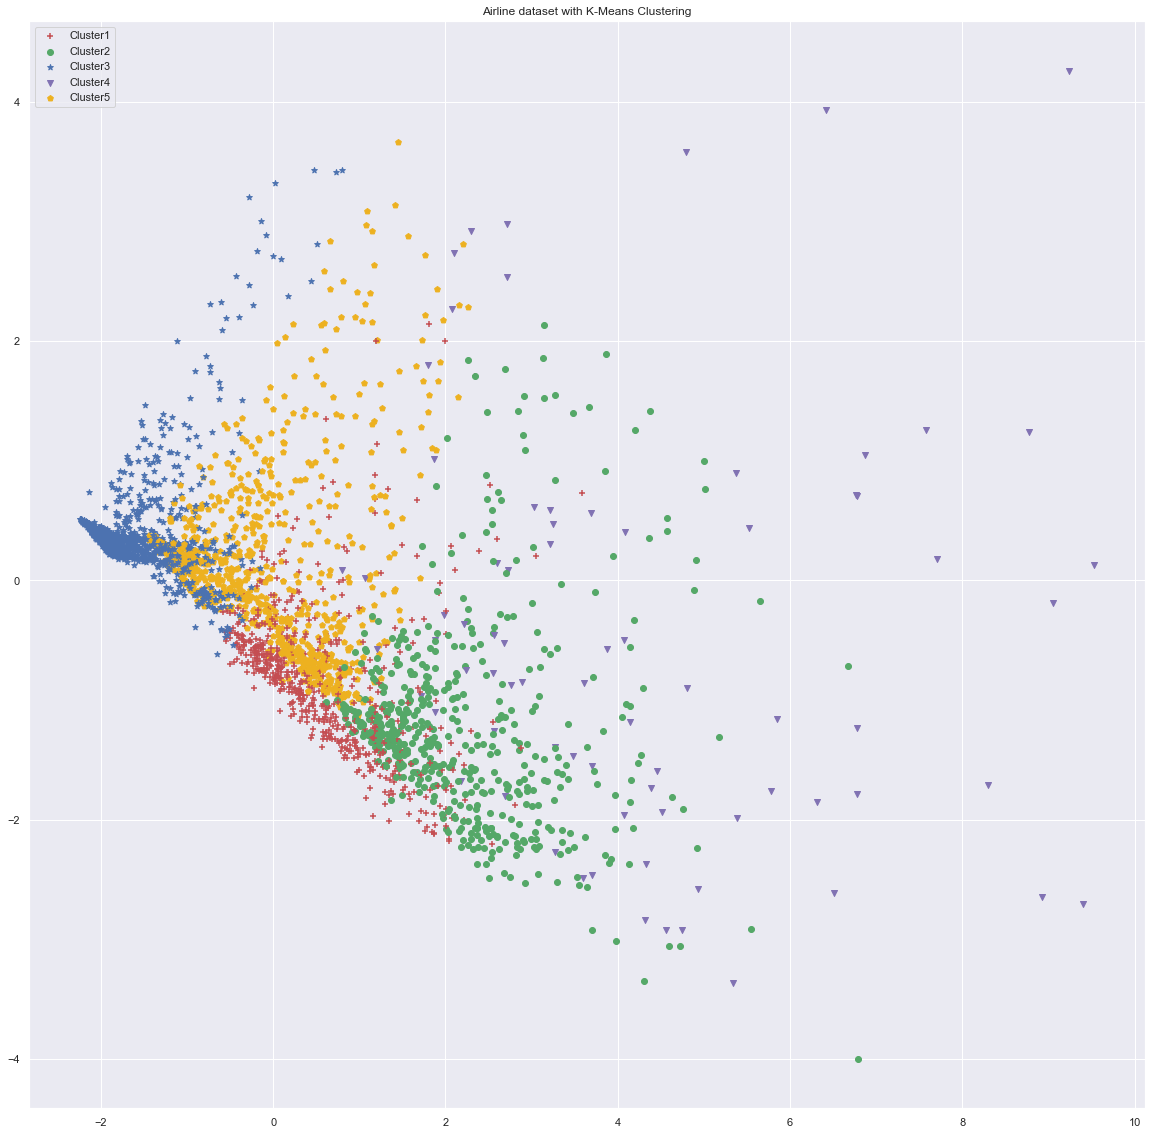

In [64]:
import pylab as pl

sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif kmeans.labels_[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
    elif kmeans.labels_[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#EDB120', marker='p')
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2','Cluster3', 'Cluster4','Cluster5'])
pl.title('Airline dataset with K-Means Clustering')
pl.show()

## Heirarchial Agglomerative Clustering

#### Identifying the hyperparameters

- Number of Clusters could be 4 just as in previous case.
- euclidean distance can be followed
- linkage will be single

#### Making a dentogram

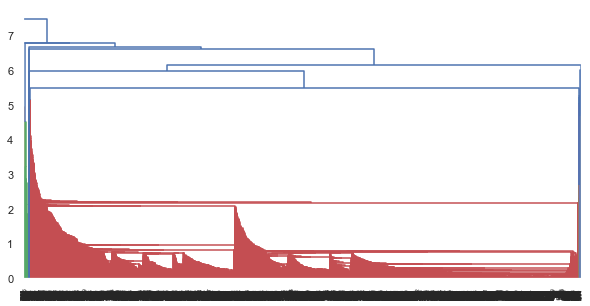

In [82]:
import scipy.cluster.hierarchy as sch
#dentogram linkage takes too much time to process. Not adivasable
#dendrogram = sch.dendrogram(sch.linkage(normscaled, method='single'))

#### Building Agglomerative clustering model

In [100]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(normscaled)

#### Get Clusters.labels_

In [101]:
y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [102]:
data_agglo = raw_data.copy()
data_agglo['clusters_agglo'] = y_hc
data_agglo.clusters_agglo.value_counts()

1    3782
0     170
4      28
2      15
3       4
Name: clusters_agglo, dtype: int64

#### Model Evaluation & Visualisation

In [103]:
data_agglo.groupby('clusters_agglo').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_agglo,,,,,,,,,,,
0,117123.664706,255.752941,2.252941,1.341176,1.000000,37437.170588,26.729412,4066.623529,11.882353,4701.688235,0.705882
1,65902.071655,137.370703,2.033580,1.000000,1.000793,15571.369910,10.724484,270.585405,0.818350,4072.294553,0.350344
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143


In [104]:
#Visualising the data via dimensionality reduction

pca_agg = PCA(n_components=2).fit(normscaled)
pca_2d_agg = pca_agg.transform(normscaled)

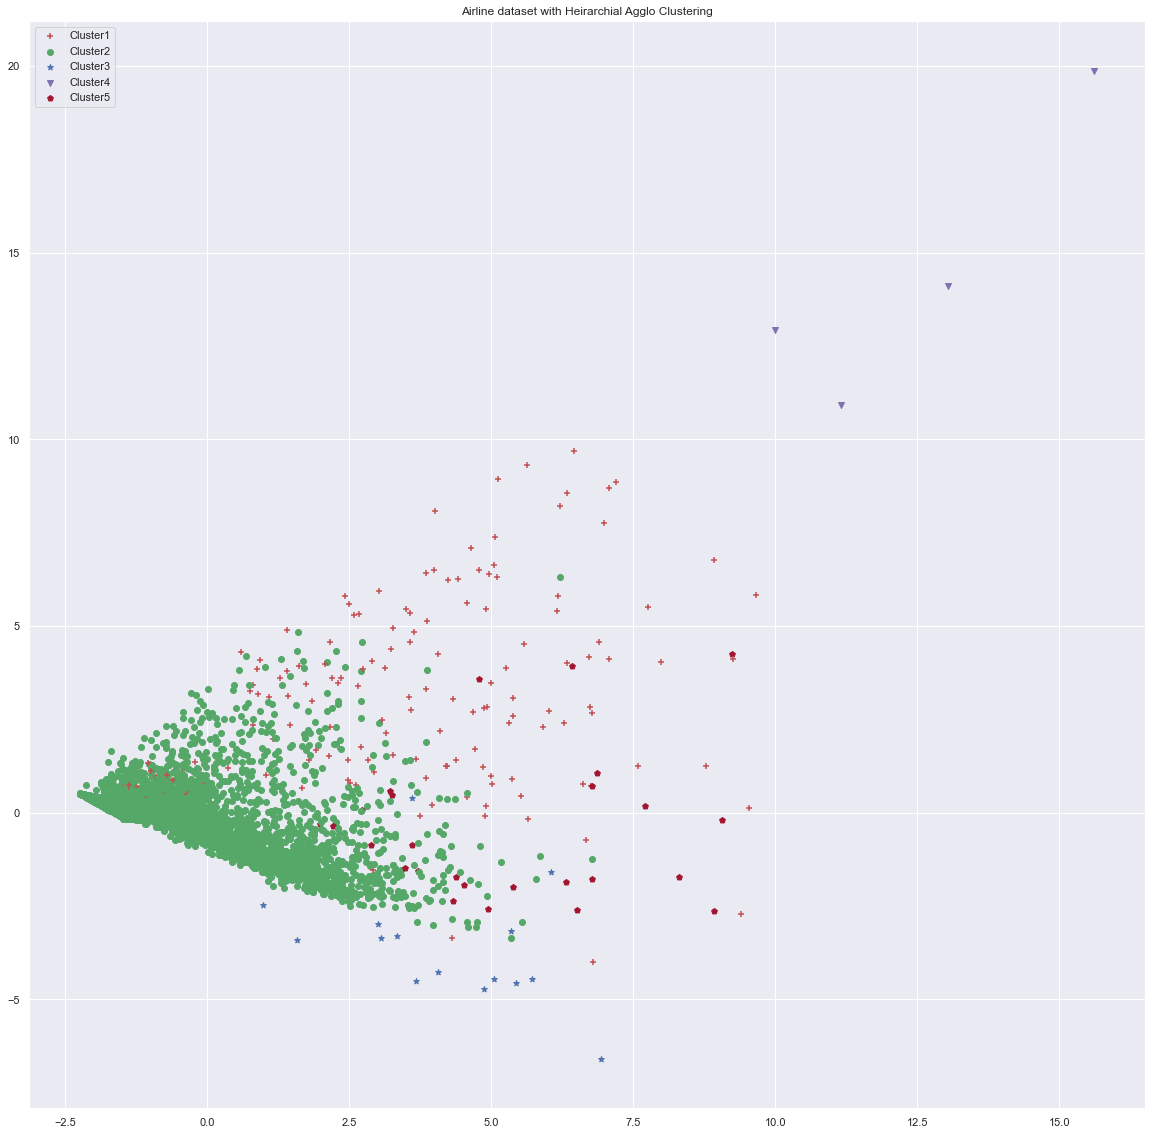

In [144]:
sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, pca_2d_agg.shape[0]):
    if y_hc[i] == 0:
        c1 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='r', marker='+')
    elif y_hc[i] == 1:
        c2 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='g', marker='o')
    elif y_hc[i] == 2:
        c3 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='b', marker='*')
    elif y_hc[i] == 3:
        c4 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='m', marker='v')
    elif y_hc[i] == 4:
        c5 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='#A2142F', marker='p')
  
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4','Cluster5'])
pl.title('Airline dataset with Heirarchial Agglo Clustering')
pl.show()

## DBSCAN Clustering

#### Fixing the Hyperparameters

- Epsilon value is taken to be 1
- Min pts is 8 since there is high density

#### DBSCAN Model Building

In [151]:
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan.fit(scaled_data)

DBSCAN(eps=2, min_samples=10)

#### Get Clusters.labels_

In [152]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [153]:
data_dbscan = raw_data.copy()
data_dbscan['clusters_dbscan'] = dbscan.labels_
data_dbscan['clusters_dbscan'].value_counts()

 0    2442
 1    1304
-1     237
 2      16
Name: clusters_dbscan, dtype: int64

#### Model Evaluation and Visualisation

In [154]:
data_dbscan.groupby('clusters_dbscan').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_dbscan,,,,,,,,,,,
-1,227782.236287,1491.704641,2.687764,1.177215,1.206751,48347.751055,25.485232,3326.915612,9.666667,4834.666667,0.746835
0,57638.687142,42.589271,1.696151,1.000000,1.000000,9779.582719,8.901310,188.470925,0.549550,3813.633907,0.000000
1,75894.286043,91.086656,2.638804,1.000000,1.000000,25364.305215,14.112730,450.680982,1.416411,4566.894172,1.000000
2,39218.500000,0.000000,1.000000,2.000000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000


In [155]:
#Visualising the data via dimensionality reduction

pca_db = PCA(n_components=2).fit(scaled_data)
pca_2d_db = pca_db.transform(scaled_data)

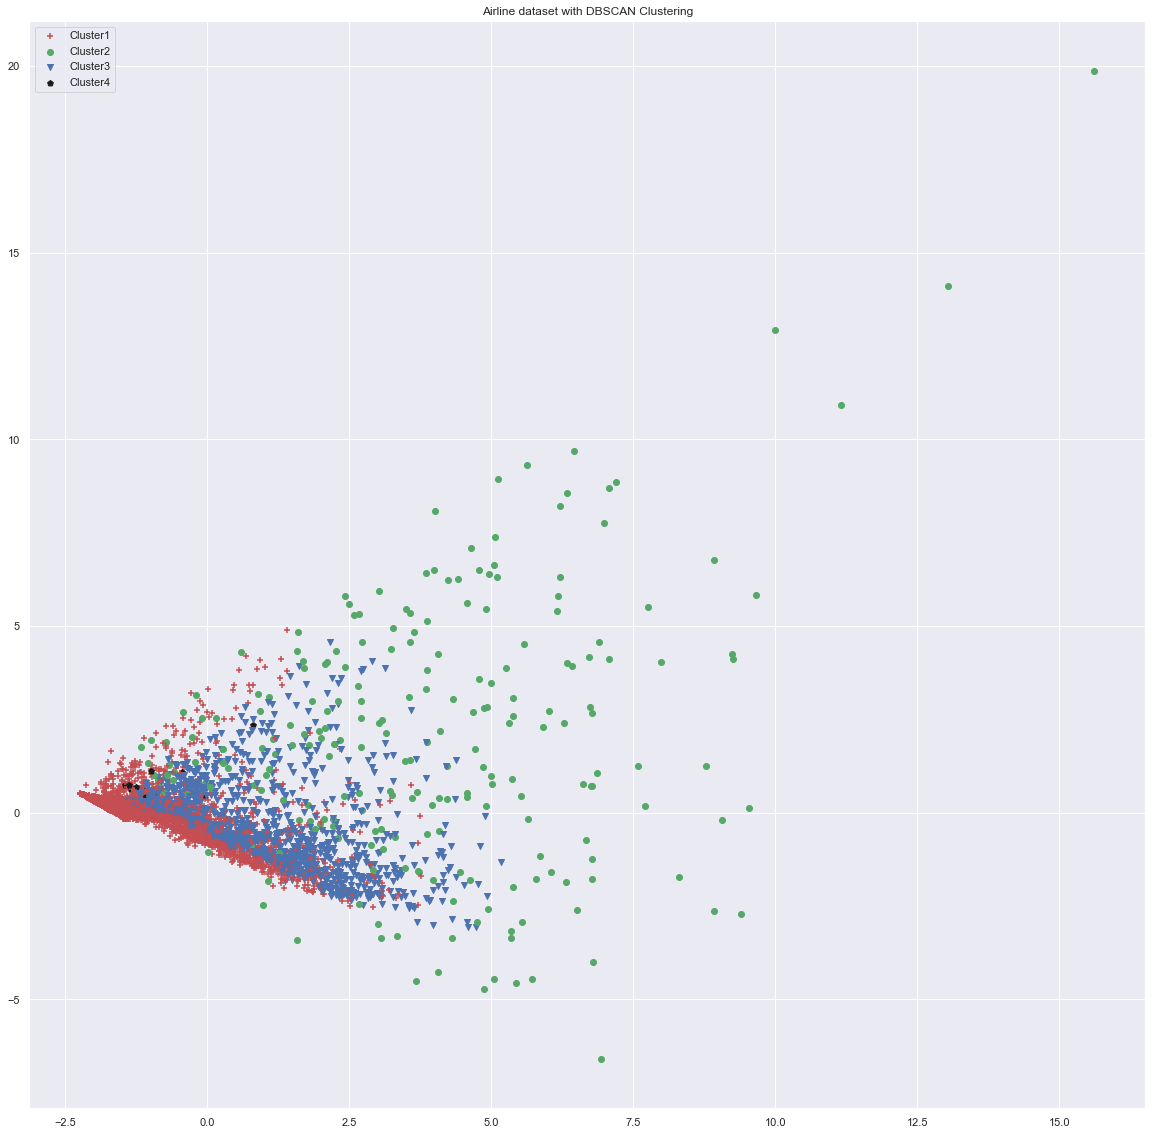

In [156]:
sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, pca_2d_db.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == -1:
        c2 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == 1:
        c3 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='b', marker='v')
    elif dbscan.labels_[i] == 2:
        c4 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='k', marker='p')
        
pl.legend([c1, c2, c3,c4], ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])
pl.title('Airline dataset with DBSCAN Clustering')
pl.show()

## Conclusion
- DBScan shows the best model in the three cases since it is density based. It also shows various outlier noise points which require additional attention for the airline's schemes.
- Heirarchial clustering took the largest processing time. It's output is not very apt. 
- Similar scenario is observed in the case of k-means clustering since the datapoints are very dense.